In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
class Perceptron:
    def __init__(self, features, epochs=1000, learning_rate=0.01):
        self.epochs = epochs
        self.features = features
        self.learning_rate = learning_rate
        self.weights = [0 for i in range(features+1)]
        
        print("Epochs\t\t: ",epochs)
        print("Features\t: ",features)
        print("Learning Rate\t: ",learning_rate)
        
    def predict(self, inp):
        summ = self.weights[0]
        summ += sum([inp[j]*self.weights[j+1] for j in range(self.features)])
        return 1 if summ>0 else 0

    def train(self, inp, labels):
        for _ in range(self.epochs):
            for res, label in zip(inp, labels):
                prediction = self.predict(res)
                self.weights[1:] += self.learning_rate * (label - prediction) * res
                self.weights[0] += self.learning_rate * (label - prediction)
        
        print("\nTrained Weight:\n"+"\n".join(map(str,self.weights)))
            
        
    def Predict2(self, testData):
        predicted = list()
        testLabel = list(map(int, testData[:,-1]))

        print("Labels\tPredicted")

        for i in range(len(testLabel)):
            predicted.append(self.predict(test[i,:-1]))
            print(f'{testLabel[i]}\t{predicted[-1]}')

        return testLabel, predicted


In [3]:
def Confusion_Matrix(testLabel, predicted):
    confusion = {'TP':0, 'TN':0, 'FP':0, 'FN':0}
    for i in range(len(predicted)):
        if testLabel[i] == 1 and predicted[i] == 1:
            confusion['TP']+=1
        elif testLabel[i] == 1 and predicted[i] == 0:
            confusion['FN']+=1
        elif testLabel[i] == 0 and predicted[i] == 1:
            confusion['FP']+=1
        else:
            confusion['TN']+=1
    return confusion

def Display_Confusion_Matrix(testLabel, predicted):
    data = {'Actual Label': testLabel, 'Predicted Label': predicted}
    df = pd.DataFrame(data, columns=data.keys())
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)

def CalculateMetrics(confusion):
    accuracy = (confusion['TP']+confusion['TN'])/sum(confusion.values())
    precision = confusion['TP']/(confusion['TP']+confusion['FP'])
    recall = confusion['TP']/(confusion['TP']+confusion['FN'])
    print("\nMatrix Metrics:-")
    print(f"Accuracy \t: {round(accuracy,4)}\nPrecision \t: {round(precision,4)}\nRecall  \t: {round(recall,4)}\n")



In [4]:
def create_dataset():
    data = np.zeros((100,5), dtype=float)

    np.random.seed(0)
    data[:50,4] = 0
    data[50:,4] = 1

    for i in range(data.shape[1]-1):
        data[:50, i] = np.random.random((1,50))*10
        data[50:, i] = np.random.random((1,50))*50

    df = pd.DataFrame(data, columns= ['Feature'+str(i) for i in range(1,5)]+['label'])
    df.to_csv("DataSet.csv", index=False)

create_dataset()

#Splitting Dataset into Train and test Dataset
df = pd.read_csv('DataSet.csv')
df.head()
data = df.to_numpy()
test = np.vstack((data[:20], data[50:70]))
train = np.vstack((data[20:50], data[70:]))
features = train[:,:-1]
labels = train[:,-1]

In [5]:
p = Perceptron(features.shape[1], 1000, 0.01)
p.train(features, labels)
print("\nOutput for test data:-")
testLabel, predicted = p.Predict2(test)

Epochs		:  1000
Features	:  4
Learning Rate	:  0.01

Trained Weight:
-4.679999999999945
0.06845009380314658
-0.05521632672696186
0.25371162895331417
0.16471684061920044

Output for test data:-
Labels	Predicted
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	0
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1



The Confusion Matrix:-
TP : 19
TN : 20
FP : 0
FN : 1

Matrix Metrics:-
Accuracy 	: 0.975
Precision 	: 1.0
Recall  	: 0.95



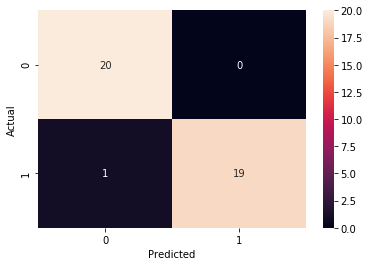

In [6]:
#Confusion Metrix and Metrics
confusion = Confusion_Matrix(testLabel, predicted)
print("\nThe Confusion Matrix:-")
for k,v in confusion.items():
    print("{} : {}".format(k,v))
Display_Confusion_Matrix(testLabel, predicted)
CalculateMetrics(confusion)